## Regresion Lineal para la reconstruccion de ventas en periodos negados

In [37]:
import cx_Oracle as oc
import pandas as pd
import numpy as np

In [38]:
con=oc.connect('PFM/PFM2020$@pythonsrv.southcentralus.cloudapp.azure.com')

Consulta el modelo y talla negada en la tienda

In [39]:
sql=pd.read_sql_query('''
select TI_CVE_N,
       ULT_SUST_DEF,
       TALLA_INI_MIN,
       TALLA_FIN_MAX,
       TA_CVE_N,
       FECHA,
       EXISTENCIA,
       VENTA
from venta
where ult_sust_def=14339 
    and ta_cve_n=29
    and ti_cve_n=1
''',con)

In [40]:
df=pd.DataFrame(sql)

Establece la fecha como indice

In [41]:
df = df.set_index('FECHA')
df.head(20)

,TI_CVE_N,ULT_SUST_DEF,TALLA_INI_MIN,TALLA_FIN_MAX,TA_CVE_N,EXISTENCIA,VENTA
FECHA,,,,,,,
2019-03-01,1,14339,25,30,29,4,0
2019-03-02,1,14339,25,30,29,4,0
2019-03-03,1,14339,25,30,29,4,0
2019-03-04,1,14339,25,30,29,4,0
2019-03-05,1,14339,25,30,29,4,0
2019-03-06,1,14339,25,30,29,4,0
2019-03-07,1,14339,25,30,29,4,0
2019-03-08,1,14339,25,30,29,4,0
2019-03-09,1,14339,25,30,29,4,0


Se muestra el comportamiento de la venta vs existencia

In [6]:
import seaborn as sns

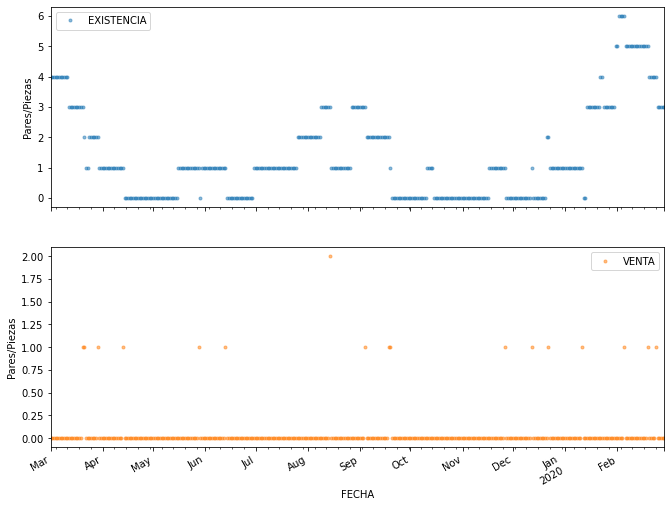

In [7]:
cols_plot = ['EXISTENCIA', 'VENTA']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Pares/Piezas')

Se obtiene el dia de la semana para hacer la regresion lineal con ventas del mismo dia

In [8]:
# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.day_name()
df['Day Number'] = df.index.dayofyear

negados=df[df["EXISTENCIA"]==0]
negados.head(14)

,TI_CVE_N,ULT_SUST_DEF,TALLA_INI_MIN,TALLA_FIN_MAX,TA_CVE_N,EXISTENCIA,VENTA,Year,Month,Weekday Name,Day Number
FECHA,,,,,,,,,,,
2019-04-14,1,14339,25,30,29,0,0,2019,4,Sunday,104
2019-04-15,1,14339,25,30,29,0,0,2019,4,Monday,105
2019-04-16,1,14339,25,30,29,0,0,2019,4,Tuesday,106
2019-04-17,1,14339,25,30,29,0,0,2019,4,Wednesday,107
2019-04-18,1,14339,25,30,29,0,0,2019,4,Thursday,108
2019-04-19,1,14339,25,30,29,0,0,2019,4,Friday,109
2019-04-20,1,14339,25,30,29,0,0,2019,4,Saturday,110
2019-04-21,1,14339,25,30,29,0,0,2019,4,Sunday,111
2019-04-22,1,14339,25,30,29,0,0,2019,4,Monday,112


Se localiza el periodo negado

In [26]:
periodo=df.loc['2019-10-14':'2019-12-14']
periodo

,TI_CVE_N,ULT_SUST_DEF,TALLA_INI_MIN,TALLA_FIN_MAX,TA_CVE_N,EXISTENCIA,VENTA,Year,Month,Weekday Name,Day Number
FECHA,,,,,,,,,,,
2019-10-14,1,14339,25,30,29,1,0,2019,10,Monday,287
2019-10-15,1,14339,25,30,29,0,0,2019,10,Tuesday,288
2019-10-16,1,14339,25,30,29,0,0,2019,10,Wednesday,289
2019-10-17,1,14339,25,30,29,0,0,2019,10,Thursday,290
2019-10-18,1,14339,25,30,29,0,0,2019,10,Friday,291
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-10,1,14339,25,30,29,0,0,2019,12,Tuesday,344
2019-12-11,1,14339,25,30,29,0,0,2019,12,Wednesday,345
2019-12-12,1,14339,25,30,29,1,1,2019,12,Thursday,346


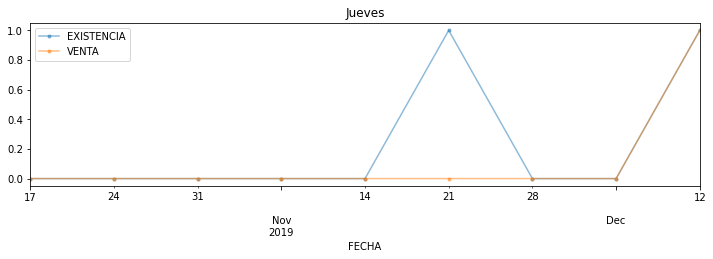

In [27]:
thursday=periodo[periodo['Weekday Name']=='Thursday']

axes = thursday[['EXISTENCIA', 'VENTA']].plot(marker='.', alpha=0.5, linestyle='-', figsize=(12, 3), title='Jueves')

In [28]:
thursday

,TI_CVE_N,ULT_SUST_DEF,TALLA_INI_MIN,TALLA_FIN_MAX,TA_CVE_N,EXISTENCIA,VENTA,Year,Month,Weekday Name,Day Number
FECHA,,,,,,,,,,,
2019-10-17,1,14339,25,30,29,0,0,2019,10,Thursday,290
2019-10-24,1,14339,25,30,29,0,0,2019,10,Thursday,297
2019-10-31,1,14339,25,30,29,0,0,2019,10,Thursday,304
2019-11-07,1,14339,25,30,29,0,0,2019,11,Thursday,311
2019-11-14,1,14339,25,30,29,0,0,2019,11,Thursday,318
2019-11-21,1,14339,25,30,29,1,0,2019,11,Thursday,325
2019-11-28,1,14339,25,30,29,0,0,2019,11,Thursday,332
2019-12-05,1,14339,25,30,29,0,0,2019,12,Thursday,339
2019-12-12,1,14339,25,30,29,1,1,2019,12,Thursday,346


Se toman los dias con existencia para hacer la regresion lineal

In [29]:
jueves=thursday[thursday["EXISTENCIA"]>0]
X = jueves["Day Number"].to_numpy().reshape(-1, 1)
Y = jueves["VENTA"].to_numpy().reshape(-1, 1)
print(X)
print(Y)

[[325]
 [346]]
[[0]
 [1]]


Se calcula la Regresion Lineal

In [30]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, Y)
print(lm.intercept_,lm.coef_,lm.score(X, Y))

[-15.47619048] [[0.04761905]] 1.0


Se estiman las ventas de todos los dias incluidos los dias negados

In [31]:
x = jueves["Day Number"].to_numpy().reshape(-1, 1)
y = lm.predict(x)
jueves["vta_estimada"]=y

<ipython-input-31-9862660e415e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jueves["vta_estimada"]=y


In [33]:
y

array([[0.],
       [1.]])

Se grafican las ventas estimadas con la regresion lineal

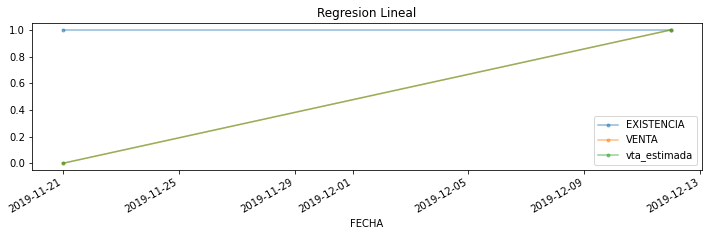

In [34]:
jueves[['EXISTENCIA', 'VENTA','vta_estimada']].plot(marker='.', alpha=0.5, linestyle='-', figsize=(12, 3), title='Regresion Lineal')

In [35]:
jueves[jueves["EXISTENCIA"]==0]

,TI_CVE_N,ULT_SUST_DEF,TALLA_INI_MIN,TALLA_FIN_MAX,TA_CVE_N,EXISTENCIA,VENTA,Year,Month,Weekday Name,Day Number,vta_estimada
FECHA,,,,,,,,,,,,


In [36]:
jueves

,TI_CVE_N,ULT_SUST_DEF,TALLA_INI_MIN,TALLA_FIN_MAX,TA_CVE_N,EXISTENCIA,VENTA,Year,Month,Weekday Name,Day Number,vta_estimada
FECHA,,,,,,,,,,,,
2019-11-21,1,14339,25,30,29,1,0,2019,11,Thursday,325,0.0
2019-12-12,1,14339,25,30,29,1,1,2019,12,Thursday,346,1.0
